In [1]:
# 사용할 모듈 불러오기 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
items = pd.read_csv("./data/items.csv")
shops = pd.read_csv("./data/shops.csv")
train = pd.read_csv("./data/sales_train.csv")
test = pd.read_csv("./data/test.csv")
item_categories = pd.read_csv('./data/item_categories.csv')

In [4]:
pivot_for_train = train.pivot_table(index = ['date_block_num'] , values=['item_cnt_day'],aggfunc='sum')
pivot_for_train.head()

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0


In [5]:
df = pivot_for_train.reset_index()
df.head()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0


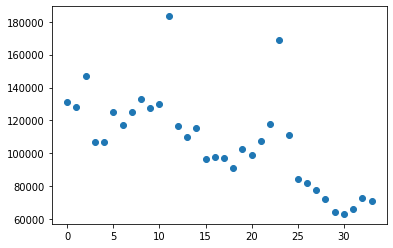

In [6]:
X = df["date_block_num"]
y = df["item_cnt_day"]
plt.plot(X, y, 'o')
plt.show()

In [7]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [8]:
# 34를 예측한다면?
line_fitter.predict([[34]])

array([73288.42245989])

In [9]:
# 기울기
line_fitter.coef_

array([-1943.52880061])

In [10]:
# 절편
line_fitter.intercept_

139368.40168067228

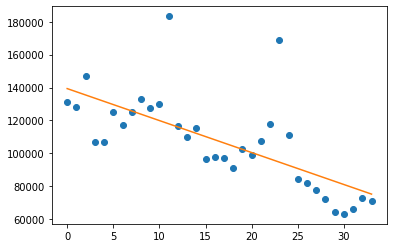

In [11]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

In [12]:
# 비교 테스트
df.head()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0


In [13]:
from sklearn.model_selection import train_test_split
x = df[['date_block_num']]
y = df[['item_cnt_day']]

In [14]:
x_train

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

In [ ]:
y_predict = mlr.predict(x_test)
y_predict

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color = 'purple', alpha = 0.6, label = 'train')
plt.scatter(x_test, y_test, color = 'orange', alpha = 0.6, label = 'test')

plt.xlabel("date_block_num")
plt.ylabel("item_cnt_day")
plt.title("sales")
plt.legend()
plt.show()

In [ ]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(df[['date_block_num']], df[['item_cnt_day']], alpha=0.4)
plt.show()

In [ ]:
#당연히 최선의 R²는 1이겠지만 그건 말이 안 되고, 일반적으로 0.7 정도면 양호한 것으로 간주한다.
#위 예제에서 14개의 변수를 넣고 생성한 모델의 결정계수를 확인해보자.

print(mlr.score(x_train, y_train))

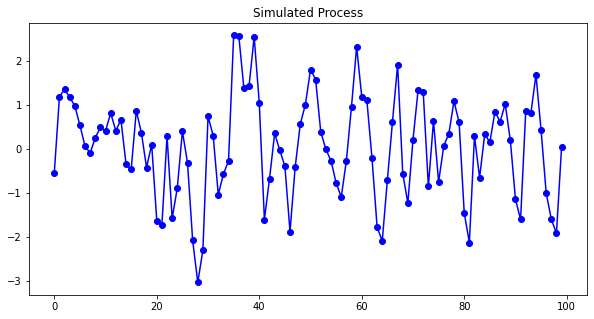

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf 
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf 
from statsmodels.regression.linear_model import yule_walker 
#from statsmodels.tsa.stattools import adfuller 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

# 데이터 생성하기 
ar = np.array([1, -0.8, 0.2])
ma = np.array([1])
my_simulation = ArmaProcess(ar,ma).generate_sample(nsample=100)

plt.figure(figsize=[10,5]) ; # 그림의 크기 설정 
plt.plot(my_simulation, linestyle = '-', marker = 'o', color = 'b')
plt.title("Simulated Process")
plt.show()